## **Laboratorio 9: Implementación algoritmo de Newton**
**Facultad de ingeniería, departamento de Ingeniería Biomédica, Universidad de los Andes**\
**IBIO-2340: Fundamentos del machine learning**

**Nombres de los integrantes**


1.   John Anderson Acosta
2.   Nombre integrante 2

**Número del grupo**

*grupo 2*

# **Método de Newton**
El método de Newton es una alternativa al algoritmo de descenso de gradiente al tener en cuenta la segunda derivada de la función que se desea optimizar. Considere la función $f: \mathbb{R}^n → \mathbb{R}$. Sea $x[k]\in\mathbb{R}^n$ el valor del candidato a solución en la iteración $k$. La regla de actualización en el método de Newton es:
\begin{align*}
  x[k+1] = x[k] - F^{-1}(x[k])∇f( x[k]),
\end{align*}
donde $F^{-1}(x[k])$ es la inversa de la Hessiana evaluada en x[k].

\\

El algoritmo completo se podría plantear de la siguiente manera:
0. Definir $k=0$, un parámetro de convergengia $ϵ$ y un número máximo de iteraciones $N_{max}$
1. Seleccionar un punto inicial $x[0]$
2. Calcular $∇f( x[k])$ y $F^{-1}(x[k])$
3. Calcular $x[k+1] = x[k] - F^{-1}(x[k])∇f( x[k])$
4. Si $||x[k+1]-x[k]||_2<ϵ$, parar. Si no, $k=k+1$ y volver al paso 2.


El objetivo de esta práctica es comparar el método de Newton con el algortimo de descenso de gradiente para minimizar una función de prueba dada con una condición de parada previamente definida. Para esto, considere la siguiente función:

\begin{align*}
 f(x) = (1-x_1)^2 + 5(x_2-x_1^2)^2,
\end{align*}

donde $x=[x_1,x_2]^T$. Con base en lo anterior, siga los siguientes pasos:





1. Encuentre el vector gradiente y la matriz Hessiana manualmente y escribalos a continuación.

**Responder aquí**



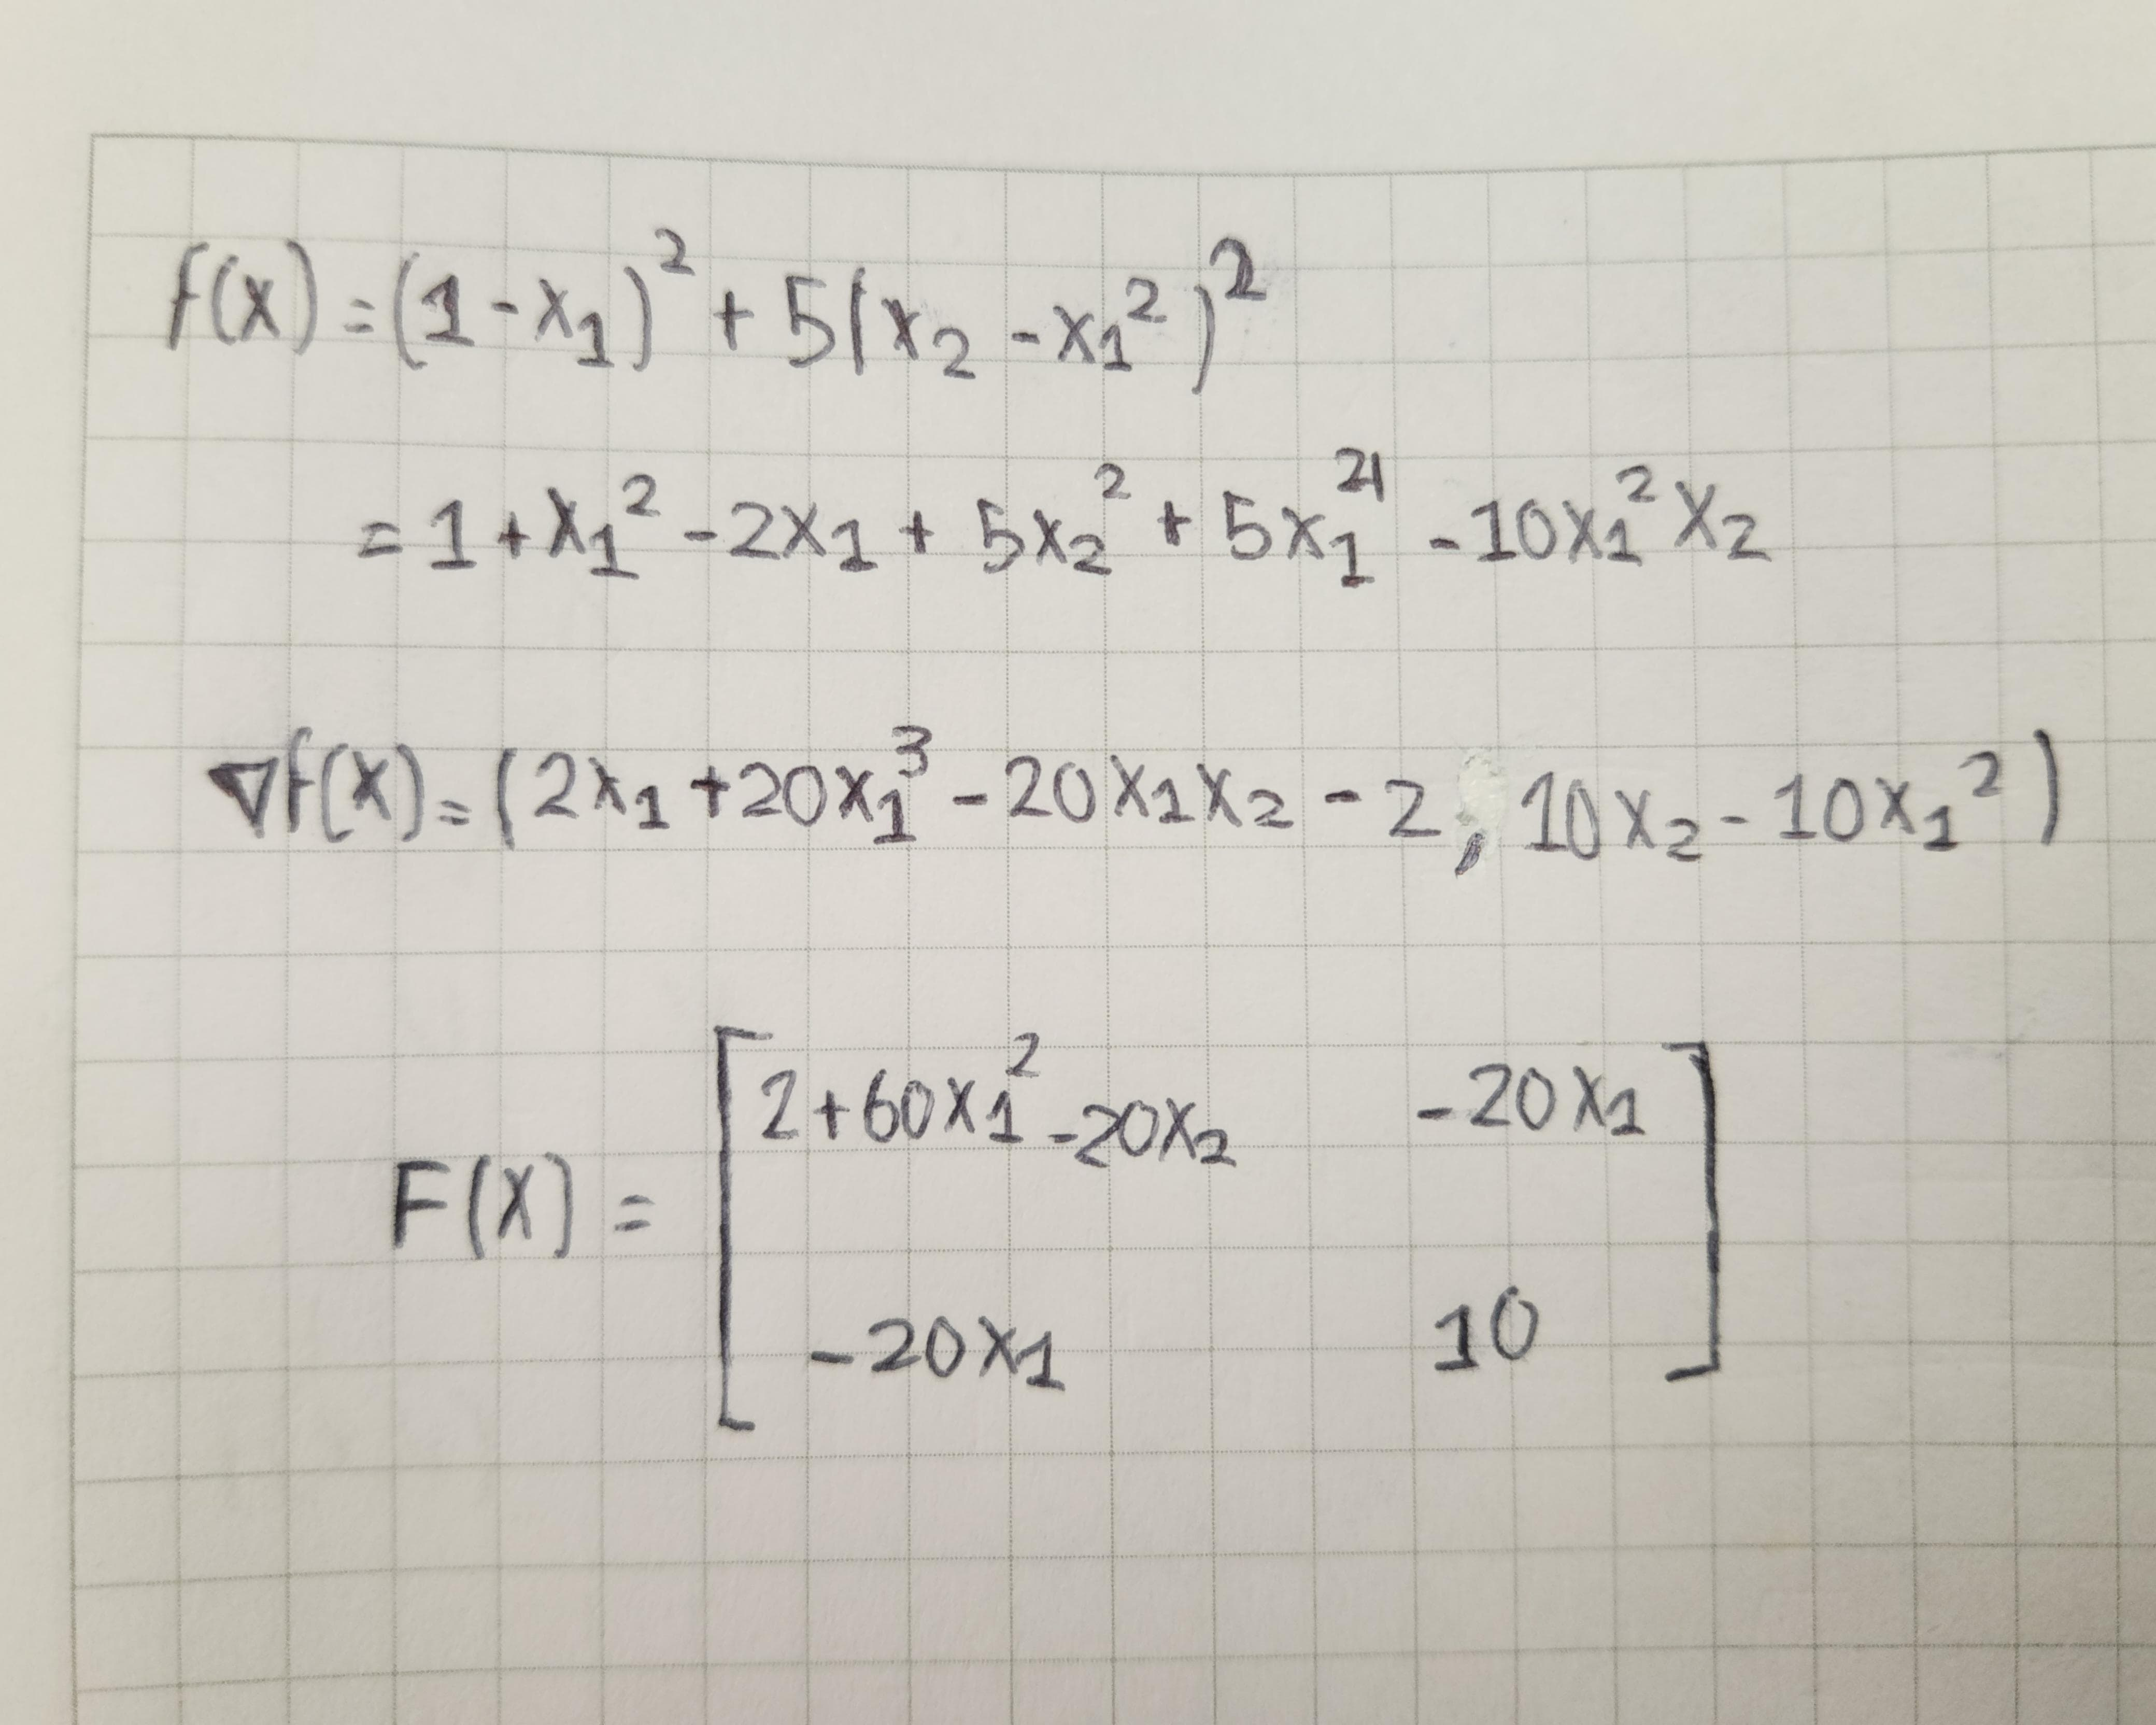

2. Implemente el método de Newton teniendo en cuenta las condición de parada mencionada anteriormente con los siguientes parámetros:

 - $ϵ=0.1$
 - $x[0]=[0,0]^T$


In [ ]:
import numpy as np

e= 0.1
X0 = np.array([0, 0])

def fun(X):

  x_final =np.array(X)
  return np.array([((1-x_final[0])**2 )+ (5*(x_final[1]-x_final[0]**2)**2)])

def grad(X):

  y=np.array(X)
  x_1 = y[0]
  x_2 = y[1]
  return np.array([(2*x_1)+(20*x_1**3)-(20*x_1*x_2)-2, (10*x_2)-(10*x_1**2)])
def hessiana(X):

  y=np.array(X)
  x_1 = y[0]
  x_2 = y[1]
  return np.array([[2 + 60*x_1**2 - 20*x_2,-20*x_1],[-20*x_1,10]])

def metodo(x0, nmax, e):

  puntos =[x0]
  resultados= [fun(x0)]

  for i in range(nmax):
    punto_a=puntos[-1]
    punto_n=punto_a-(np.dot(np.linalg.inv(hessiana(punto_a)) , grad(punto_a)))
    puntos.append(punto_n)
    resultados.append(fun(punto_n))
    if np.linalg.norm(punto_n - punto_a)< e:
      return puntos, resultados, False
  return puntos, resultados, True

print(metodo(X0, 1000000, e))

([array([0, 0]), array([1., 0.]), array([1., 1.]), array([1., 1.])], [array([1]), array([5.]), array([0.]), array([0.])], False)


3. Realice tres gráficas:

*   La trayectoria de $x[k]$ para los diferentes $k$ en un espacio de dos dimensiones. Es decir, los saltos que dió el algoritmo.
*   El valor la función objetivo vs número de iteraciones $k$.
*   El valor de $||x[k+1]-x[k]||_2$ vs número de iteraciones



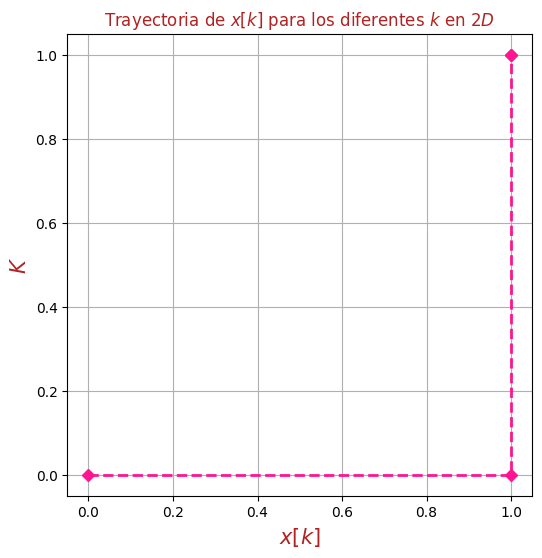

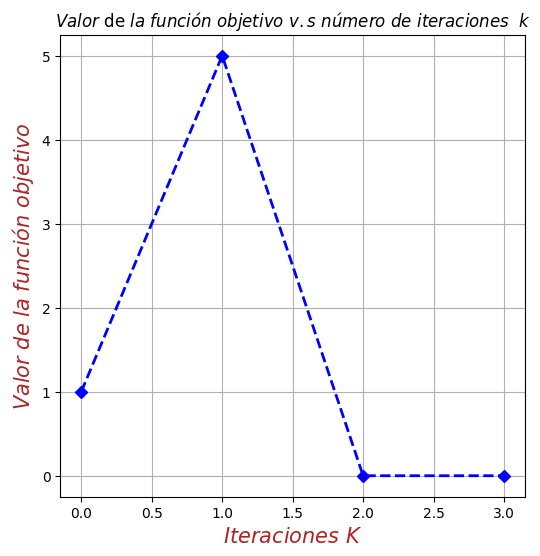

[1.0, 1.0, 0.0]


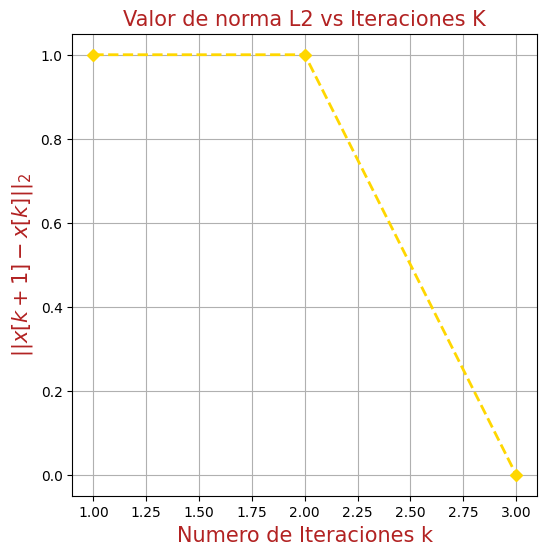

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X0 = np.array([0, 0])
e=0.1

newton=metodo(X0, 10000, e)
Puntos_x=[]
Puntos_y=[]

for i in newton[0]:
  Puntos_x.append(i[0])
  Puntos_y.append(i[1])

#Esta funcion toma los puntos del primer valor de la funcion def metodo(x0, nmax, e).
# El primer valor de la funcion metodo son los arrays de los puntos que rrecorio el metodo desde (0,0)

plt.figure(figsize=(6, 6))
plt.plot(Puntos_x, Puntos_y, marker="D", linestyle="--", color ="deeppink", linewidth=2)
plt.xlabel("$x[k]$",size=15 , color ="firebrick")
plt.ylabel("$K$",size=15 , color ="firebrick")
plt.title("Trayectoria de $x[k]$ para los diferentes $k$ en $2D$", color="firebrick")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(range(len(newton[1])), newton[1], linestyle="--", color ="blue", linewidth=2, marker="D")
plt.xlabel("$Iteraciones$ $K$",size=15 , color ="firebrick")
plt.ylabel("$Valor$ $de$ $la$ $función$ $objetivo$",size=15 , color ="firebrick")
plt.title("$Valor$ de $la$ $función$ $objetivo$ $v.s$ $número$ $de$ $iteraciones$  $k$", color="firebrick")
plt.grid(True)
plt.show()

normas= []
for K in range(len(newton[0])-1):
  normas.append(np.linalg.norm(newton[0][K+1] - newton[0][K], 2))

print(normas)


plt.figure(figsize=(6, 6))
plt.plot(range(1, len(normas)+1), normas, marker="D", linestyle="--", color ="gold", linewidth=2)
plt.xlabel("Numero de Iteraciones k",size=15 , color ="firebrick")
plt.ylabel("$||x[k+1]-x[k]||_2$",size=15 , color ="firebrick")
plt.title("Valor de norma L2 vs Iteraciones K",size=15 , color ="firebrick")
plt.grid(True)
plt.show()

4. Ahora, use el algortimo de descenso de gradiente hecho en prácticas anteriores para encontrar el mínimo de la función. Use $α=0.01$.

In [ ]:
X0 = np.array([0, 0])
e=0.1
alfa=0.01

def grad_descend(X0, alfa, n, e):
    puntos = [X0]
    resultados = [fun(X0)]
    for i in range(n):
        punto_a=puntos[-1]
        punto_n= punto_a - (alfa * grad(punto_a))
        puntos.append(punto_n)
        resultados.append(fun(punto_n))
        if np.linalg.norm(punto_n - punto_a, 2)<= e:
            return puntos, resultados, True
    return puntos, resultados, False
print(grad_descend(X0,alfa,10000,e))

([array([0, 0]), array([0.02, 0.  ])], [array([1]), array([0.9604008])], True)


5. Para el algoritmo de descenso de gradiente implementado en el punto 4., realice tres gráficas:

*   La trayectoria de $x[k]$ para los diferentes $k$ en un espacio de dos dimensiones. Es decir, los saltos que dió el algoritmo.
*   El valor la función objetivo vs número de iteraciones $k$.
*   El valor de $||x[k+1]-x[k]||_2$ vs número de iteraciones

[0, 0.02] [0, 0.0]


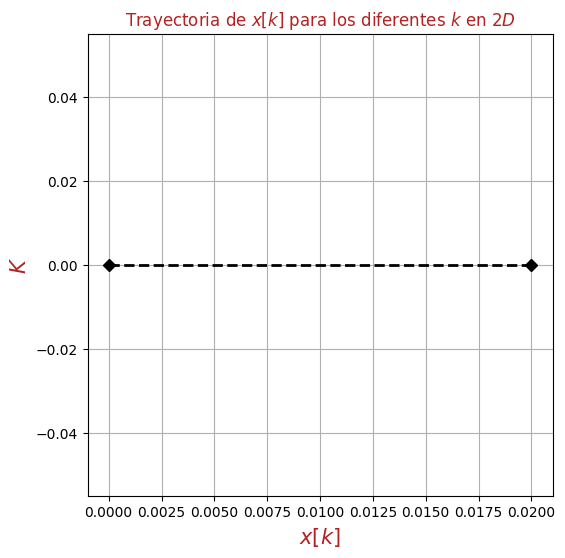

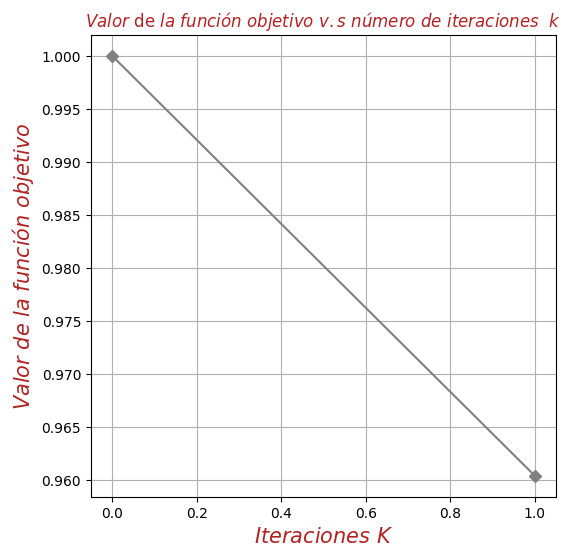

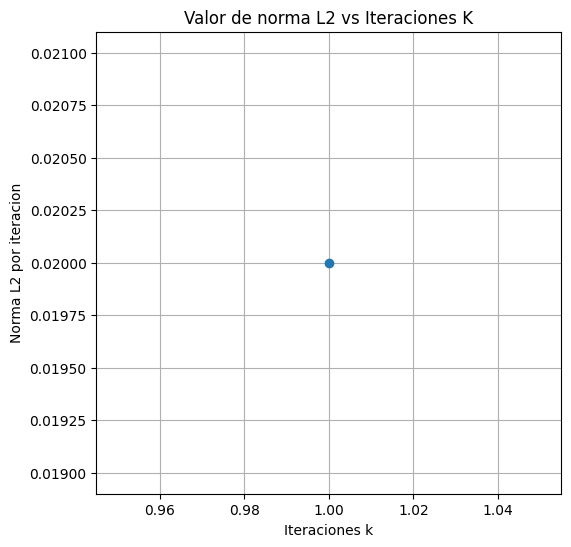

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

X0 = np.array([0, 0])
e=0.1
a=0.01

grad1= grad_descend(X0,a,10000,e)
Puntos_x=[]
Puntos_y=[]

for i in grad1[0]:
  Puntos_x.append(i[0])
  Puntos_y.append(i[1])

print(Puntos_x,Puntos_y)

plt.figure(figsize=(6, 6))
plt.plot(Puntos_x, Puntos_y, marker="D", linestyle="--", color ="black", linewidth=2)
plt.xlabel("$x[k]$",size=15 , color ="firebrick")
plt.ylabel("$K$",size=15 , color ="firebrick")
plt.title("Trayectoria de $x[k]$ para los diferentes $k$ en $2D$", color="firebrick")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(range(len(grad1[1])), grad1[1], marker="D", linestyle="-", color="gray")
plt.xlabel("$Iteraciones$ $K$",size=15 , color ="firebrick")
plt.ylabel("$Valor$ $de$ $la$ $función$ $objetivo$",size=15 , color ="firebrick")
plt.title("$Valor$ de $la$ $función$ $objetivo$ $v.s$ $número$ $de$ $iteraciones$  $k$", color ="firebrick")
plt.grid(True)
plt.show()

normas= []
for i in range(len(grad1[0])-1):
  normas.append(np.linalg.norm(grad1[0][i+1] - grad1[0][i], 2))


plt.figure(figsize=(6, 6))
plt.plot(range(1, len(normas)+1), normas, marker='o', linestyle='-')
plt.xlabel("Iteraciones k")
plt.ylabel("Norma L2 por iteracion")
plt.title("Valor de norma L2 vs Iteraciones K")
plt.grid(True)
plt.show()

[0, 0.02, 0.039598400000000006, 0.05879433046537278, 0.07758006327029608, 0.09594313222251769, 0.11386815210864079, 0.13133838401552275, 0.14833707317838032, 0.16484857225336003, 0.18085925582027, 0.19635822962241933, 0.2113378392697346, 0.2257939866849492, 0.23972626735505276, 0.253137946470177, 0.26603579646904524, 0.27842982176442577, 0.2903328981430767, 0.30176035441809973, 0.3127295224670837, 0.32325927908636753, 0.33336959949464623, 0.343081138223686, 0.3524148489134649, 0.361391650496764, 0.370032143646341, 0.3783563783124607, 0.38638367076642793] [0, 0.0, 4e-05, 0.00019280332825600004, 0.0005192003249175463, 0.001069146914128106, 0.0018827406847820465, 0.0029910622227674972, 0.00441693311207164, 0.006175628528777292, 0.00827557085329669, 0.010719020809553208, 0.013502774162642964, 0.016618864977098684, 0.020055270921697118, 0.023796612155526028, 0.027824832934287246, 0.03211985414115045, 0.03666018529181239, 0.04142348593704697, 0.04638706849319599, 0.05152833706612541, 0.05682

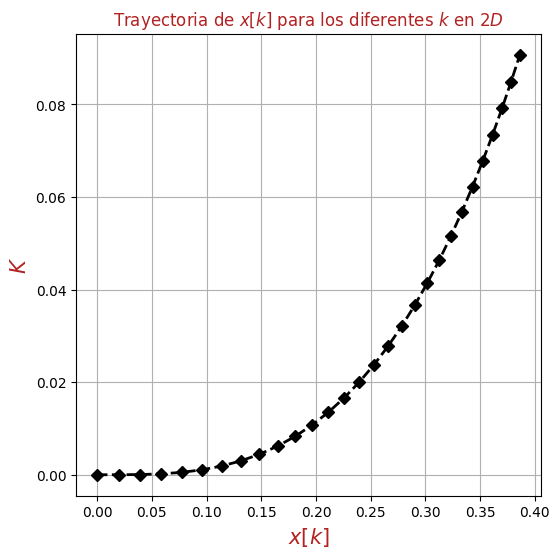

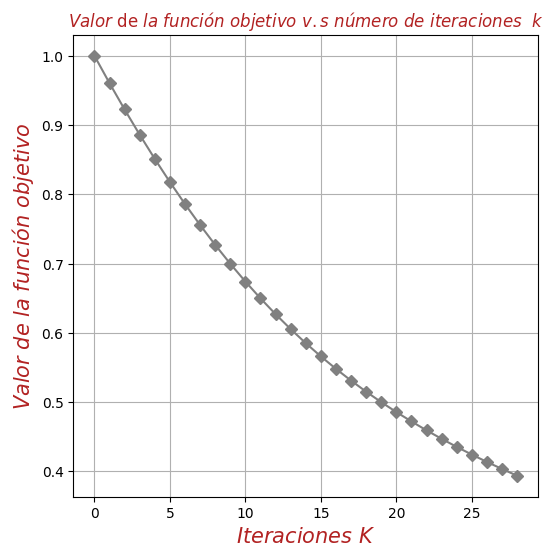

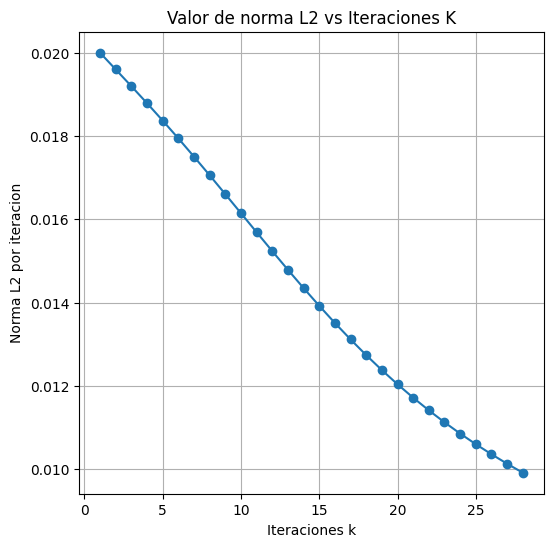

In [ ]:
#Si se usa un e en  e = 0.01, la funcion y la grafica tienen mas puntos, esto se explica a causa de que la función tiene mas puntos que no superan la ||x[k+1]-x[k]||_2 ≤ ϵ

import numpy as np
import matplotlib.pyplot as plt

X0 = np.array([0, 0])
e=0.01
a=0.01

grad1= grad_descend(X0,a,10000,e)
Puntos_x=[]
Puntos_y=[]

for i in grad1[0]:
  Puntos_x.append(i[0])
  Puntos_y.append(i[1])

print(Puntos_x,Puntos_y)

plt.figure(figsize=(6, 6))
plt.plot(Puntos_x, Puntos_y, marker="D", linestyle="--", color ="black", linewidth=2)
plt.xlabel("$x[k]$",size=15 , color ="firebrick")
plt.ylabel("$K$",size=15 , color ="firebrick")
plt.title("Trayectoria de $x[k]$ para los diferentes $k$ en $2D$", color="firebrick")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(range(len(grad1[1])), grad1[1], marker="D", linestyle="-", color="gray")
plt.xlabel("$Iteraciones$ $K$",size=15 , color ="firebrick")
plt.ylabel("$Valor$ $de$ $la$ $función$ $objetivo$",size=15 , color ="firebrick")
plt.title("$Valor$ de $la$ $función$ $objetivo$ $v.s$ $número$ $de$ $iteraciones$  $k$", color ="firebrick")
plt.grid(True)
plt.show()

normas= []
for i in range(len(grad1[0])-1):
  normas.append(np.linalg.norm(grad1[0][i+1] - grad1[0][i], 2))


plt.figure(figsize=(6, 6))
plt.plot(range(1, len(normas)+1), normas, marker='o', linestyle='-')
plt.xlabel("Iteraciones k")
plt.ylabel("Norma L2 por iteracion")
plt.title("Valor de norma L2 vs Iteraciones K")
plt.grid(True)
plt.show()

[0, 0.02, 0.039598400000000006, 0.05879433046537278, 0.07758006327029608, 0.09594313222251769, 0.11386815210864079, 0.13133838401552275, 0.14833707317838032, 0.16484857225336003, 0.18085925582027, 0.19635822962241933, 0.2113378392697346, 0.2257939866849492, 0.23972626735505276, 0.253137946470177, 0.26603579646904524, 0.27842982176442577, 0.2903328981430767, 0.30176035441809973, 0.3127295224670837, 0.32325927908636753, 0.33336959949464623, 0.343081138223686, 0.3524148489134649, 0.361391650496764, 0.370032143646341, 0.3783563783124607, 0.38638367076642793, 0.3941324667881948, 0.4016202464464849, 0.4088634652410858, 0.41587752611675405, 0.4226767769212444, 0.4292745281764939, 0.43568308648291953, 0.44191379941642217, 0.4479771083542694, 0.45388260624092286, 0.45963909785104506, 0.4652546606069644, 0.47073670445205645, 0.4760920296658766, 0.4813268818316894, 0.48644700343534797, 0.49145768179111105, 0.4963637931607157, 0.501169843062967, 0.5058800028683216, 0.5104981428421355, 0.5150278618

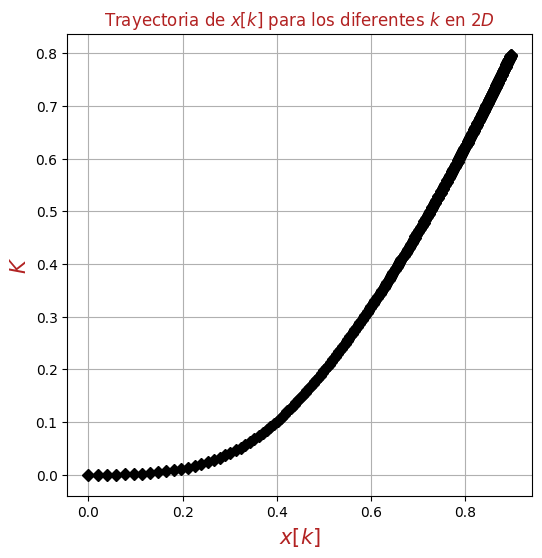

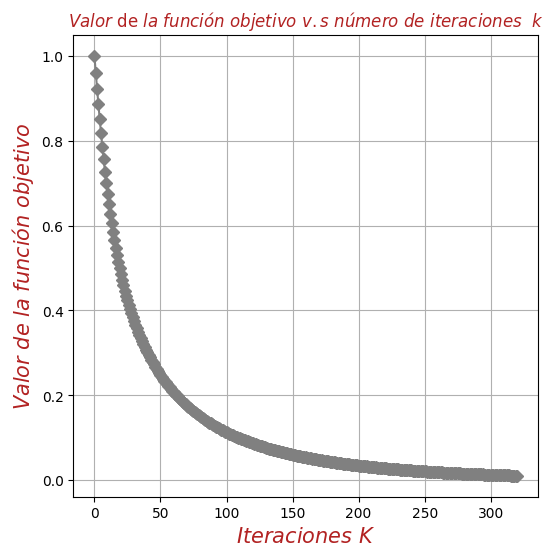

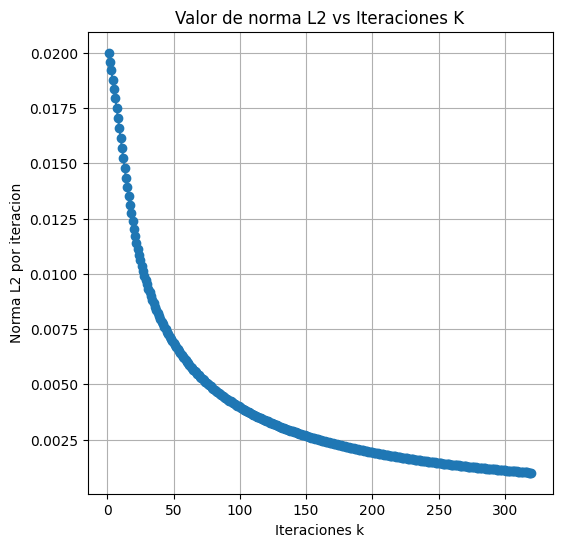

In [ ]:
#Si se usa un e en  e = 0.001, la funcion y la grafica tienen mas puntos, esto se explica a causa de que la función tiene mas puntos que no superan la ||x[k+1]-x[k]||_2 ≤ ϵ

import numpy as np
import matplotlib.pyplot as plt

X0 = np.array([0, 0])
e=0.001
a=0.01

grad1= grad_descend(X0,a,10000,e)
Puntos_x=[]
Puntos_y=[]

for i in grad1[0]:
  Puntos_x.append(i[0])
  Puntos_y.append(i[1])

print(Puntos_x,Puntos_y)

plt.figure(figsize=(6, 6))
plt.plot(Puntos_x, Puntos_y, marker="D", linestyle="--", color ="black", linewidth=0.5)
plt.xlabel("$x[k]$",size=15 , color ="firebrick")
plt.ylabel("$K$",size=15 , color ="firebrick")
plt.title("Trayectoria de $x[k]$ para los diferentes $k$ en $2D$", color="firebrick")
plt.grid(True)
plt.show()

plt.figure(figsize=(6, 6))
plt.plot(range(len(grad1[1])), grad1[1], marker="D", linestyle="-", color="gray")
plt.xlabel("$Iteraciones$ $K$",size=15 , color ="firebrick")
plt.ylabel("$Valor$ $de$ $la$ $función$ $objetivo$",size=15 , color ="firebrick")
plt.title("$Valor$ de $la$ $función$ $objetivo$ $v.s$ $número$ $de$ $iteraciones$  $k$", color ="firebrick")
plt.grid(True)
plt.show()

normas= []
for i in range(len(grad1[0])-1):
  normas.append(np.linalg.norm(grad1[0][i+1] - grad1[0][i], 2))


plt.figure(figsize=(6, 6))
plt.plot(range(1, len(normas)+1), normas, marker='o', linestyle='-')
plt.xlabel("Iteraciones k")
plt.ylabel("Norma L2 por iteracion")
plt.title("Valor de norma L2 vs Iteraciones K")
plt.grid(True)
plt.show()

6. Responda las siguientes preguntas:

- ¿Por qué cree que al algoritmo de descenso de gradiente le cuesta más converger que el método de Newton?

Esto se debe, a porque el método de descenso de gradiente busca encontrar el minimizador de una función al usar el "alfa" que limita o determina la cantidad de iteraciones o pasos para llegar a esta o que se acabe la iteración, los cuales son equivalentes a la derivada de la función en ese punto. Por tal motivo, en el caso de funciones con pendientes muy altas, y que visualmente tiene una curvatura muy estrecha, es necesario elegir un valor pequeño para alfa, en funcion de evitar que de saltos grandes, ya que este método solo considera la pendiente de la función (la derivada) y, por tal motivo, necesita dar pasos pequeños para evitar sobrepasar el punto mínimo. Por otro lado, el método de Newton tiene en cuenta tanto la pendiente como la curvatura o forma de la función de la función. Ya que en lugar de depender únicamente del alfa para controlar el tamaño de los pasos, usa la matriz hessiana, que describe la curvatura de la función, señala el punto de maximo crecimiento. Esto permite que el método de Newton ajuste automáticamente el tamaño de los pasos de acuerdo con la información sobre la curvatura de la función, en lugar de depender de un alfa fijo, que es capaz de fallar, lo que lo hace más eficiente en funciones con curvaturas complejas

- Note el grado del polinómio de la función, ¿para qué grado polinómico el método de Newton converge en una sola iteración?

Para un grado polinómico 1 el algorítmo converge en una sola iteración

- ¿Cree que el punto inicial influye en la convergencia de ambos algortimos?

Con la informacion que se ha dado en el curso, creo que tanto el método de Newton como el descenso de gradiente buscan mínimos locales, como una forma de optimización, tienen un gran influencia por el punto inicial que se usa. Por lo tanto la elección del punto de inicio tendrá un impacto importante en el mínimo que cada algoritmo encontrará en una función que tenga múltiples mínimos locales.

- ¿Cómo podría mejorar la eficiencia del descenso de gradiente?

He observado que el descenso de gradiente exhibe este comportamiento debido a su uso de un valor fijo para el alfa. Sin embargo, si se adaptara el valor de alfa en función de la derivada en cada punto, sería posible alcanzar el mínimo de manera más eficiente y rápida.